# Introduction

In this lab exercise, you will learn how to perform scientometric network analysis in Python. We will start with practicalities on some basic data handling and import. We then move on to creating a network and cover some basic analysis. In the next session, we will be using more advanced techniques.

<div class="alert alert-info">
This Python notebook is intended to be used as an exercise. We have prepared it for you to include many details, but at some parts we will ask you to fill in some of the blanks. Exercises where you are asked to do something, or to think about something, will be indicated like this. If you need to execute and write your own code, we provide empty space below to do so.
</div>

<div class="alert alert-warning">
If you need any help with anything, please don't hesitate to ask your teachers. 
</div>

# Data handling

Python is a general purpose programming language and it can be used to handle data in general. In this notebook we will specifically deal with scientometric datasets, but you can also use it for other purposes.

We will start by handling some data from a scientometric data source. There are many different possible data sources, and we discussed some of them earlier this week. In this notebook we will focus on data downloaded from Web of Science. We have already downloaded some data for you to demonstrate Python. At the end of the exercise you will be asked to load your own data. 

The data that we provided is a selection of publications from authors from Belgium from Tropical Medicine from 2000-2017.

<div class="alert alert-warning">
    <b>Note:</b> You cannot load your own data when you run this notebook online using Binder.
</div>

We start by loading the data. In order to read in the data, we first need to make sure that Python is able to read it. A very versatile *package* for handling data in Python is called `pandas`. For those of you familiar with `R`, it is similar to the `data.frame` in `R`.

We *import* this package as follows, and we call the `pandas` package `pd`, for easy reference. We also need the `csv` package to indicate some options to the `pandas` package.

<div class="alert alert-success">
    In order to execute the code you have to press <code>Ctrl-Enter</code> while selecting the code cell below. Alternatively, you can press the "Play" button at the top of the screen. This also moves to the next cell at the same time. Using <code>Shift-Enter</code> instead of <code>Ctrl-Enter</code> will also execute the code and move to the next cell at the same time.
</div>

In [1]:
import pandas as pd
import csv

<div class="alert alert-success">
    If you have executed that code cell correctly, it should now be numbered <code>1</code>. While the code in a cell is being executed it is marked by an asterisk <code>*</code>. Each cell of executed code will be numbered in the order in which you execute it. If you execute it again, it will be numbered <code>2</code>, et cetera.
</div>

We are now ready to read in the data that you just downloaded. We have named the `pandas` package `pd`, which will save us some typing.

In [2]:
publications_df = pd.read_csv('data-files/wos/tab-delimited/savedrecs_0001_0500.txt', 
                              sep='\t', index_col='UT',
                              quoting=csv.QUOTE_NONE, usecols=range(68))

We called the *function* `read_csv` of the `pandas` package. We provide it with several *arguments*. 

1. The location of the file we want to read.

2. The second argument is a *named argument*, we provide both the name of the argument (`sep`) and its value (`'\t'`). This indicates the *sep*arator between different fields. In this case it is a tab-delimited file, so the fields are separated by tabs, which is indicated by `'\t'`.

3. The third argument is again a named argument. We indicate that the `UT` field should be the index. This is the unique identifier that WoS uses.

The two subqeuent arguments are needed to correctly handle some peculiarities of WoS files.

<div class="alert alert-success">
We downloaded some example files for you, which are located in the folder <code>data_files/wos</code>. At the end of this notebook, you will be asked to download your own data. If you want to load that data instead, use the path to that data.
</div>

<div class="alert alert-warning">
    <b>Note:</b> Windows usually uses backslashes <code>\</code> to separate directories, in Python you can also use the forward slash <code>/</code>, which is usually more convenient for a number of reasons.
</div>

The `pandas` package took care of reading the file, and has now stored it in the variable called `publications_df`. You can take a closer look at `publications_df` to see the data that we just read.

In [3]:
publications_df

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,EY,PG,WC,SC,GA,PM,OA,HC,HP,DA
UT,,,,,,,,,,,,,,,,,,,,,
WOS:000419235100004,J,"Lagatie, O; Ediage, EN; Pikkemaat, JA; Djuardi...",NaN,NaN,NaN,"Lagatie, Ole; Ediage, Emmanuel Njumbe; Pikkema...",NaN,NaN,"2-methyl butyramide, a previously identified u...",PARASITES & VECTORS,...,NaN,3,Parasitology; Tropical Medicine,Parasitology; Tropical Medicine,FR7GG,29284514.0,"DOAJ Gold, Green Published",NaN,NaN,2019-04-02
WOS:000416965200003,J,"Gower, CM; Gehre, F; Marques, SR; Lamberton, P...",NaN,NaN,NaN,"Gower, Charlotte M.; Gehre, Florian; Marques, ...",NaN,NaN,Phenotypic and genotypic monitoring of Schisto...,PARASITES & VECTORS,...,NaN,12,Parasitology; Tropical Medicine,Parasitology; Tropical Medicine,FO6HX,29197426.0,"DOAJ Gold, Green Published",NaN,NaN,2019-04-02
WOS:000416965200001,J,"Rahmouni, C; Vanhove, MPM; Simkova, A",NaN,NaN,NaN,"Rahmouni, Chahrazed; Vanhove, Maarten P. M.; S...",NaN,NaN,Underexplored diversity of gill monogeneans in...,PARASITES & VECTORS,...,NaN,21,Parasitology; Tropical Medicine,Parasitology; Tropical Medicine,FO6HX,29197419.0,"DOAJ Gold, Green Published",NaN,NaN,2019-04-02
WOS:000419214100010,J,"Nkanga, MSN; Longo-Mbenza, B; Vandenberghe, P;...",NaN,NaN,NaN,"Nkanga, Mireille Solange Nganga; Longo-Mbenza,...",NaN,NaN,Feasibility of iFISH patterns in hematologic m...,ASIAN PACIFIC JOURNAL OF TROPICAL BIOMEDICINE,...,NaN,4,Tropical Medicine,Tropical Medicine,FR6YT,NaN,DOAJ Gold,NaN,NaN,2019-04-02
WOS:000419108500028,J,"Fontes, ANB; Lima, LNGC; Mota, RMS; Almeida, R...",NaN,NaN,NaN,"Fontes, Amanda N. B.; Lima, Luana N. G. C.; Mo...",NaN,NaN,Genotyping of Mycobacterium leprae for better ...,PLOS NEGLECTED TROPICAL DISEASES,...,NaN,20,Infectious Diseases; Parasitology; Tropical Me...,Infectious Diseases; Parasitology; Tropical Me...,FR5LR,29244821.0,"DOAJ Gold, Green Published",NaN,NaN,2019-04-02
WOS:000419108500008,J,"Ponte-Sucre, A; Gamarro, F; Dujardin, JC; Barr...",NaN,NaN,NaN,"Ponte-Sucre, Alicia; Gamarro, Francisco; Dujar...",NaN,NaN,Drug resistance and treatment failure in leish...,PLOS NEGLECTED TROPICAL DISEASES,...,NaN,24,Infectious Diseases; Parasitology; Tropical Me...,Infectious Diseases; Parasitology; Tropical Me...,FR5LR,29240765.0,"DOAJ Gold, Green Published",NaN,NaN,2019-04-02
WOS:000416116300003,J,"Dao, TTH; Nguyen, TTG; Gabriel, S; Bui, KL; Do...",NaN,NaN,NaN,Thanh Thi Ha Dao; Thanh Thi Giang Nguyen; Gabr...,NaN,NaN,Updated molecular phylogenetic data for Opisth...,PARASITES & VECTORS,...,NaN,10,Parasitology; Tropical Medicine,Parasitology; Tropical Medicine,FN6IA,29157282.0,"DOAJ Gold, Green Published",NaN,NaN,2019-04-02
WOS:000415356100002,J,"Chembensofu, M; Mwape, KE; Van Damme, I; Hobbs...",NaN,NaN,NaN,"Chembensofu, Mwelwa; Mwape, K. E.; Van Damme, ...",NaN,NaN,Re-visiting the detection of porcine cysticerc...,PARASITES & VECTORS,...,NaN,9,Parasitology; Tropical Medicine,Parasitology; Tropical Medicine,FM8RB,29145875.0,DOAJ Gold,NaN,NaN,2019-04-02
WOS:000414967100001,J,"Muzyamba, C; Groot, W; Tomini, SM; Pavlova, M",NaN,NaN,NaN,"Muzyamba, Choolwe; Groot, Wim; Tomini, Sonila ...",NaN,NaN,The usefulness of traditional birth attendants...,TROPICAL MEDICINE AND HEALTH,...,NaN,8,Tropical Medicine,Tropical Medicine,FM4FD,29158723.0,"DOAJ Gold, Green Published",NaN,NaN,2019-04-02


You will see that the data has quite cryptic column headers. Each line contains information about a single publication, and contains various details, such as the title (`TI`), abstract (`AB`), authors (`AU`), journal title (`SO`) and cited references (`CR`). Unfortunately, the documentation of Web of Science is relatively limited, but some explanation can be found <a href="http://images.webofknowledge.com/WOKRS532FR6/help/WOS/hs_advanced_fieldtags.html">here</a>. You can retrieve this information in various ways from the pandas dataframe `publications_df`. For example, you can list the first five titles as follows:

In [4]:
publications_df.TI[:5]

UT
WOS:000419235100004    2-methyl butyramide, a previously identified u...
WOS:000416965200003    Phenotypic and genotypic monitoring of Schisto...
WOS:000416965200001    Underexplored diversity of gill monogeneans in...
WOS:000419214100010    Feasibility of iFISH patterns in hematologic m...
WOS:000419108500028    Genotyping of Mycobacterium leprae for better ...
Name: TI, dtype: object

Here, `[:5]` indicates that you want the first elements (starting at 0) until (but excluding) 5, so item 0, 1, 2, 3 and 4. This is called a *slice* of the data. You can also look at authors for rows 5 until 10 as follows:

In [5]:
publications_df.AU[5:10]

UT
WOS:000419108500008    Ponte-Sucre, A; Gamarro, F; Dujardin, JC; Barr...
WOS:000416116300003    Dao, TTH; Nguyen, TTG; Gabriel, S; Bui, KL; Do...
WOS:000415356100002    Chembensofu, M; Mwape, KE; Van Damme, I; Hobbs...
WOS:000414967100001        Muzyamba, C; Groot, W; Tomini, SM; Pavlova, M
WOS:000414786900005    Klotz, C; Soba, B; Skvarc, M; Gabriel, S; Robe...
Name: AU, dtype: object

In order to get the last few elements, you can use negative indices. The last element is indicated by `-1`, the penultimate element is indicated by `-2`, and so on. You can get the journals for the last five sources as follows:

In [6]:
publications_df.SO[-5:]

UT
WOS:000400206200018    AMERICAN JOURNAL OF TROPICAL MEDICINE AND HYGIENE
WOS:000382563500012             TROPICAL MEDICINE & INTERNATIONAL HEALTH
WOS:000382390800034                     PLOS NEGLECTED TROPICAL DISEASES
WOS:000382390800039                     PLOS NEGLECTED TROPICAL DISEASES
WOS:000382390800044                     PLOS NEGLECTED TROPICAL DISEASES
Name: SO, dtype: object

Alternatively, there are various ways to index the dataframe. For example, to get the title and abstract for the first five elements you can do the following.

In [7]:
publications_df[0:5][['TI', 'AB']]

,TI,AB
UT,,
WOS:000419235100004,"2-methyl butyramide, a previously identified u...",Previous reports suggest that the 2-methyl but...
WOS:000416965200003,Phenotypic and genotypic monitoring of Schisto...,Background: Schistosoma mansoni is a parasite ...
WOS:000416965200001,Underexplored diversity of gill monogeneans in...,Background: Lake Tanganyika harbours the most ...
WOS:000419214100010,Feasibility of iFISH patterns in hematologic m...,Objective: To analyze the feasibility of detec...
WOS:000419108500028,Genotyping of Mycobacterium leprae for better ...,Leprosy is endemic in large part of Brazil wit...


The notation `['TI', 'AB']` creates a *list* of elements in Python. We now used it to get multiple columns from the dataframe. 

The following does exactly the same:

In [8]:
publications_df[['TI', 'AB']][0:5]

,TI,AB
UT,,
WOS:000419235100004,"2-methyl butyramide, a previously identified u...",Previous reports suggest that the 2-methyl but...
WOS:000416965200003,Phenotypic and genotypic monitoring of Schisto...,Background: Schistosoma mansoni is a parasite ...
WOS:000416965200001,Underexplored diversity of gill monogeneans in...,Background: Lake Tanganyika harbours the most ...
WOS:000419214100010,Feasibility of iFISH patterns in hematologic m...,Objective: To analyze the feasibility of detec...
WOS:000419108500028,Genotyping of Mycobacterium leprae for better ...,Leprosy is endemic in large part of Brazil wit...


The `pandas` package automatically determines whether you try to get columns or rows. Slices are always assumed to refer to rows.

<div class="alert alert-info">
    Show the title (<code>TI</code>), abstract (<code>AB</code>), journal (<code>SO</code>) and publication year (<code>PY</code>) for rows 200-210.
</div>

<div class="alert alert-success">
To start typing in the cell below, select the cell using the mouse, or select it using the arrows on the keyboard and press <code>Enter</code>
</div>

In [9]:
publications_df[200:210][['TI', 'AB', 'SO', 'PY']]

,TI,AB,SO,PY
UT,,,,
WOS:000412896900411,Diagnostic accuracy of point-of-care circulati...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017
WOS:000412896900420,Cross-sectional analysis in young non-pregnant...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017
WOS:000412896900422,Onchocerciasis associated epilepsy and blackfl...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017
WOS:000412896900421,The Global Point Prevalence Survey of antimicr...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017
WOS:000412896900424,Frequency of Taenia solium antigen positivity ...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017
WOS:000412896900425,Treatment issues with acute schistosomiasis in...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017
WOS:000412896900429,Incidence of adverse drug reactions resulting ...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017
WOS:000412896900428,Antibiotic resistance: the need for interdisci...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017
WOS:000412896900430,The risk and predictors of visceral Leishmania...,NaN,TROPICAL MEDICINE & INTERNATIONAL HEALTH,2017


You can also access a particular `UT` directly by using the `.loc` indexer.

In [10]:
publications_df.loc['WOS:000419235100004', ['TI', 'AU', 'SO', 'PY']]

TI    2-methyl butyramide, a previously identified u...
AU    Lagatie, O; Ediage, EN; Pikkemaat, JA; Djuardi...
SO                                  PARASITES & VECTORS
PY                                                 2017
Name: WOS:000419235100004, dtype: object

## Reading multiple files

Until now we have only loaded one file. But we have of course downloaded more files, and we need to load all of them. We can list all files in a directory using the package `glob`. We first import the package.

In [11]:
import glob

Now, let us get a list of all files in the directory `data_files/wos/tab-delimited/`.

In [12]:
files = sorted(glob.glob('data-files/wos/tab-delimited/*.txt'))
files

['data-files/wos/tab-delimited\\savedrecs_0001_0500.txt',
 'data-files/wos/tab-delimited\\savedrecs_0501_1000.txt',
 'data-files/wos/tab-delimited\\savedrecs_1001_1500.txt',
 'data-files/wos/tab-delimited\\savedrecs_1501_2000.txt',
 'data-files/wos/tab-delimited\\savedrecs_2001_2338.txt']

We asked `glob` for a list of files that end with `txt` (`*.txt`) in the directory `data-files/wos/tab-delimited`. We sorted the list to ensure that we read the files in the correct order. We can now simply pass this list of files to read multiple WoS files.

In [13]:
publications_df = pd.concat(pd.read_csv(f, sep='\t', quoting=csv.QUOTE_NONE, 
                                        usecols=range(68), index_col='UT') for f in files)
publications_df = publications_df.sort_index()

<div class="alert alert-info">
    Now checkout the new <code>publications_df</code> data frame, and see how many rows it has.
</div>

<div class="alert alert-success">
    We can simply enter <code>publications_df</code>, which then shows the content of the dataframe in a shortened way. At the bottom of the output, it shows the total number of columns and rows.
</div>

In [14]:
publications_df

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,EY,PG,WC,SC,GA,PM,OA,HC,HP,DA
UT,,,,,,,,,,,,,,,,,,,,,
WOS:000084372900003,J,"Osaer, S; Goossens, B; Eysker, M; Geerts, S",NaN,NaN,NaN,"Osaer, S; Goossens, B; Eysker, M; Geerts, S",NaN,NaN,The effects of prophylactic anthelmintic treat...,ACTA TROPICA,...,NaN,12,Parasitology; Tropical Medicine,Parasitology; Tropical Medicine,267RJ,10643903.0,NaN,NaN,NaN,2019-04-02
WOS:000085634000001,J,"Aventin, L; Matthys, F",NaN,NaN,NaN,"Aventin, L; Matthys, F",NaN,NaN,Editorial: Do we negotiate human health ?,TROPICAL MEDICINE & INTERNATIONAL HEALTH,...,NaN,2,"Public, Environmental & Occupational Health; T...","Public, Environmental & Occupational Health; T...",289QT,10672198.0,NaN,NaN,NaN,2019-04-02
WOS:000085825800025,J,"Yersin, C; Bovet, P; Merien, F; Clement, J; La...",NaN,NaN,NaN,"Yersin, C; Bovet, P; Merien, F; Clement, J; La...",NaN,NaN,Pulmonary haemorrhage as a predominant cause o...,TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL ...,...,NaN,6,"Public, Environmental & Occupational Health; T...","Public, Environmental & Occupational Health; T...",292ZH,10748905.0,NaN,NaN,NaN,2019-04-02
WOS:000085825800030,J,"De Clercq, D; Vercruysse, J; Verle, P; Niasse,...",NaN,NaN,NaN,"De Clercq, D; Vercruysse, J; Verle, P; Niasse,...",NaN,NaN,Efficacy of artesunate against Schistosoma man...,TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL ...,...,NaN,2,"Public, Environmental & Occupational Health; T...","Public, Environmental & Occupational Health; T...",292ZH,10748910.0,NaN,NaN,NaN,2019-04-02
WOS:000086145500003,J,"Boelaert, JR; Taramelli, D",NaN,NaN,NaN,"Boelaert, JR; Taramelli, D",NaN,NaN,Untitled,AMERICAN JOURNAL OF TROPICAL MEDICINE AND HYGIENE,...,NaN,2,"Public, Environmental & Occupational Health; T...","Public, Environmental & Occupational Health; T...",298NF,10761717.0,NaN,NaN,NaN,2019-04-02
WOS:000086271300013,J,"Vlieghe, E",NaN,NaN,NaN,"Vlieghe, E",NaN,NaN,Untitled,TROPICAL MEDICINE & INTERNATIONAL HEALTH,...,NaN,1,"Public, Environmental & Occupational Health; T...","Public, Environmental & Occupational Health; T...",300UM,10766519.0,NaN,NaN,NaN,2019-04-02
WOS:000086276300008,J,"Verle, P; Nhan, DH; Tinh, TT; Uyen, TT; Thuong...",NaN,NaN,NaN,"Verle, P; Nhan, DH; Tinh, TT; Uyen, TT; Thuong...",NaN,NaN,Glucose-6-phosphate dehydrogenase deficiency i...,TROPICAL MEDICINE & INTERNATIONAL HEALTH,...,NaN,4,"Public, Environmental & Occupational Health; T...","Public, Environmental & Occupational Health; T...",300WG,10747283.0,Bronze,NaN,NaN,2019-04-02
WOS:000086382200006,J,"Southgate, VR; de Clercq, D; Sene, M; Rollinso...",NaN,NaN,NaN,"Southgate, VR; de Clercq, D; Sene, M; Rollinso...",NaN,NaN,Observations on the compatibility between Buli...,ANNALS OF TROPICAL MEDICINE AND PARASITOLOGY,...,NaN,8,"Public, Environmental & Occupational Health; P...","Public, Environmental & Occupational Health; P...",302TR,10827870.0,NaN,NaN,NaN,2019-04-02
WOS:000086850000011,J,"Apers, LM",NaN,NaN,NaN,"Apers, LM",NaN,NaN,Maternal mortality: the figures-value and vali...,TROPICAL DOCTOR,...,NaN,4,"Public, Environmental & Occupational Health; T...","Public, Environmental & Occupational Health; T...",310VP,10842554.0,NaN,NaN,NaN,2019-04-02


## Data summarisation

The `pandas` package provides various ways to summarise the data and get a useful overview of the data. For example, you can group by a certain column, and count or sum things. For example, we can count the number of articles in each journal that is included in this dataset:

In [15]:
grouped_by_journal = publications_df.groupby('SO')
grouped_by_journal.size().sort_values(ascending=False)[:10]

SO
TROPICAL MEDICINE & INTERNATIONAL HEALTH                              1025
AMERICAN JOURNAL OF TROPICAL MEDICINE AND HYGIENE                      360
PLOS NEGLECTED TROPICAL DISEASES                                       275
MALARIA JOURNAL                                                        197
TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL MEDICINE AND HYGIENE     133
PARASITES & VECTORS                                                    105
ACTA TROPICA                                                            82
MEDECINE ET SANTE TROPICALES                                            18
ANNALS OF TROPICAL MEDICINE AND PARASITOLOGY                            18
JOURNAL OF TROPICAL PEDIATRICS                                          18
dtype: int64

We could also ask the mean publication year of publications in those journals

In [16]:
grouped_by_journal['PY'].mean()

SO
ACTA TROPICA                                                                                              2008.548780
AMERICAN JOURNAL OF TROPICAL MEDICINE AND HYGIENE                                                         2011.005556
ANNALS OF TROPICAL MEDICINE AND PARASITOLOGY                                                              2004.555556
ANNALS OF TROPICAL MEDICINE AND PUBLIC HEALTH                                                             2008.000000
ANNALS OF TROPICAL PAEDIATRICS                                                                            2005.200000
ASIAN PACIFIC JOURNAL OF TROPICAL BIOMEDICINE                                                             2016.666667
ASIAN PACIFIC JOURNAL OF TROPICAL MEDICINE                                                                2012.750000
BIOMEDICA                                                                                                 2012.000000
BULLETIN DE LA SOCIETE DE PATHOLOGIE EXOTIQUE        

<div class="alert alert-info">
    Group by the year (<code>PY</code>) and count the number of paper from each year.
</div>

<div class="alert alert-success">
Now it is time to introduce you a little trick: you can get a list of all functions and argument of some variable  by simply pressing <code>Tab</code>. For example, you can type <code>publications_df.</code>, including the <code>.</code> and then press <code>Tab</code> (make sure the cursor is located after the <code>.</code>). If you then start typing the name of the function you are looking for and press <code>Tab</code> again, Python will automatically finish it as much as possible. This is something general: whenever you press <code>Tab</code> Python will try to <em>autocomplete</em> whatever you are typing.

One other trick: if you have selected a function and press <code>Shift-Tab</code> you will get documentation of what this function does. You can press the <code>+</code> to find out more.
</div>

In [17]:
print(publications_df.groupby('PY').size())

PY
2000     42
2001     35
2002     43
2003     41
2004     43
2005     73
2006     65
2007    128
2008    116
2009    174
2010    145
2011    232
2012     93
2013    152
2014    109
2015    278
2016    118
2017    451
dtype: int64


## Network generation

Ultimately, we would like to use this data to generation scientometric networks. This is not a trivial task, and we will now show how to construct a co-authorship network and a journal level bibliographic coupling network.

We first load the network analysis package that we will use in the notebook, `igraph`.

<div class="alert alert-info">
    Import the pacakge <code>igraph</code> and call it <code>ig</code>.
</div>

In [18]:
import igraph as ig

### Co-authorship

We first build a co-authorship network. We will do this one publication at the time. All combinations of authors that are involved in a publication are co-authors. Let us look at the authors for publication 0.

In [19]:
publications_df['AU'][0]

'Osaer, S; Goossens, B; Eysker, M; Geerts, S'

Note that the authors are all listed and separated with a semicolon (`;`). In computer terms, it is now a single *string*. We will split this string of all authors into a list of strings where each string then represents a single author.

In [20]:
publications_df['AU_split'] = publications_df['AU'].fillna('').str.split('; ')

In [21]:
authors = publications_df['AU_split'][0]
authors

['Osaer, S', 'Goossens, B', 'Eysker, M', 'Geerts, S']

In order to create all possible combinations, we can use a convenient package, called `itertools`. The function `combinations` can generate all possible combinations of the elements of a list.

In [22]:
import itertools as itr
list(itr.combinations(authors, 2))

[('Osaer, S', 'Goossens, B'),
 ('Osaer, S', 'Eysker, M'),
 ('Osaer, S', 'Geerts, S'),
 ('Goossens, B', 'Eysker, M'),
 ('Goossens, B', 'Geerts, S'),
 ('Eysker, M', 'Geerts, S')]

Of course, we don't want to do this for a single publication only, but rather, for all publications in our dataset. We can do that using the function `apply`. We can supply it with a small function (called a `lambda` function) that simply takes some input and produces some output. In this case, the input are the `authors`, and the output is the result of `itr.combinations(...)`.

In [23]:
coauthors_per_publication = publications_df['AU_split'].apply(
    lambda authors: list(itr.combinations(authors, 2)))

The variable `coauthors_per_publication` is now a list of a list of co-authors per publication. That is, each element of `coauthors_per_publication` contains a list of all co-authors for that publication. So, `coauthors_per_publication[0]` contains the coauthors we examined previously.

In [24]:
coauthors_per_publication[0]

[('Osaer, S', 'Goossens, B'),
 ('Osaer, S', 'Eysker, M'),
 ('Osaer, S', 'Geerts, S'),
 ('Goossens, B', 'Eysker, M'),
 ('Goossens, B', 'Geerts, S'),
 ('Eysker, M', 'Geerts, S')]

Let us "flatten" this list. We can do that as follows:

In [25]:
coauthors = [coauthor 
                 for coauthors_publication in coauthors_per_publication 
                     for coauthor in coauthors_publication]

Finally, we can create the actual network as follows

In [26]:
G_coauthorship = ig.Graph.TupleList(
      edges=coauthors,
      vertex_name_attr='author',
      directed=False
      )

Note that this graph will still contain many duplicate edges, because there are multiple edges present. Let us therefore simplify this graph, and simply count the number of multiple edges. We first create a so-called edge attribute `n_joint_papers`. We can create it by using the edge sequence `es` of the graph. We can then simply sum this weight when we simplify the graph.

In [27]:
G_coauthorship.es['n_joint_papers'] = 1
G_coauthorship = G_coauthorship.simplify(combine_edges='sum')

Let us see how many authors (i.e. nodes) there are in the network. This is called the `vcount` (vertex count) in `igraph`.

In [28]:
G_coauthorship.vcount()

8482

Similarly, the number of edges is available as the `ecount` of the graph.

In [29]:
G_coauthorship.ecount()

72938

We can do all sorts of analysis on this network. But first, we will create a bibliographic coupling network.

### Bibliographic coupling

Bibliographic coupling and co-authorship is in a sense very similar. Previously, we computed for each publication a combination of all co-authors. For bibliographic coupling we can compute for each cited reference the combinations of all citing journals. We will first create a dataframe of all journal citations (`SO`) of a certain cited reference (`CR`). Similar to the authors, we need to first split the cited references.

In [30]:
publication_with_cr_df = publications_df.loc[pd.notnull(publications_df['CR']), ['SO', 'CR']]
publication_with_cr_df['CR'] = publication_with_cr_df['CR'].str.split('; ')

We now simply list all citations from a certain journal (`SO`) to a certain cited reference (`CR`).

In [31]:
journal_cits = [(row['SO'], cr) 
            for idx, row in publication_with_cr_df.iterrows()
                for cr in row['CR']]
journal_cits_df = pd.DataFrame(journal_cits, columns=('SO', 'CR'))

We then create all bibliographic couplings per cited reference as follows. We first group by the cited reference (`CR`) and then take all combinations of citing journals.

In [32]:
bibcoupling_per_cr = journal_cits_df.groupby('CR').apply(lambda x: itr.combinations(x['SO'], 2))

We again "flatten" this list.

In [33]:
bibcouplings = [coupling
                 for couplings in bibcoupling_per_cr
                   for coupling in couplings]

We can then create the network.

In [34]:
G_coupling = ig.Graph.TupleList(
      edges=bibcouplings,
      vertex_name_attr='SO',
      directed=False
      )

<div class="alert alert-info">
    We again need to simplify this network. Create a new edge attribute called <code>coupling</code> set it to <code>1</code> and then sum this attribute when simplifying the network.
</div>

In [35]:
G_coupling.es['coupling'] = 1
G_coupling = G_coupling.simplify(combine_edges='sum')

This network should be reasonably sized, and you should be able to visualize this network by calling `ig.plot`.

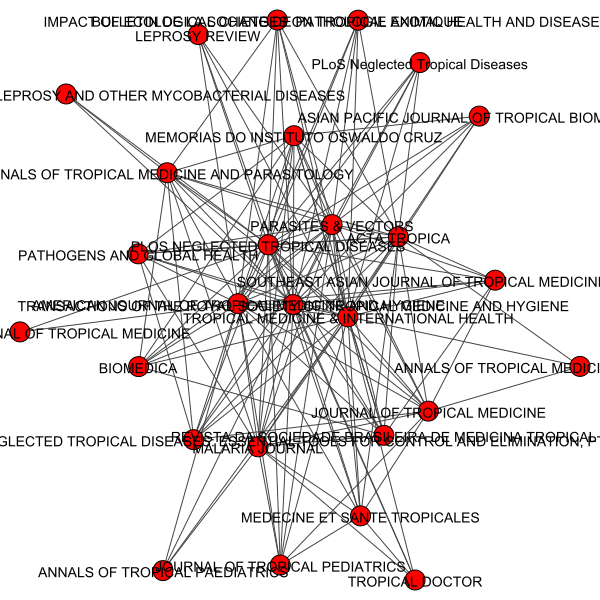

In [36]:
ig.plot(G_coupling, vertex_label=G_coupling.vs['SO'])

# Network analysis

Now that we have created some scientometric networks, let us look at some basic analyses of these networks.

## Connectivity

Let us start with a very simple question. Is the co-authorship network connected?

In [37]:
G_coauthorship.is_connected()

False

Apparently, not all authors in this dataset are connected via co-authored papers.

<div class="alert alert-info">
How many authors do you think will be connected to each other? 500? 5000? Almost everybody?
</div>

In order to take a closer look, we need to detect the *connected components*. This is easily done, but the function is confusingly called `clusters`.

In [38]:
components = G_coauthorship.clusters()

We only want the so-called giant component. 

<div class="alert alert-info">
What function do you think returns the giant component?
</div>

<div class="alert alert-success">
    Remember, you can use <code>Tab</code> and <code>Shift-Tab</code> to find out more about possible functions.
</div>

In [39]:
components.giant()

Let us only look at the giant component.

In [40]:
H = components.giant()

Let us check how many nodes are in the giant component. We can call the function `summary`.

In [41]:
print(H.summary())

IGRAPH U--- 7871 69928 -- 
+ attr: author (v), n_joint_papers (e)


The first line indicates that we have an undirected graph (`U`) with 7871 nodes and 69928 links. The next line shows vertex attributes (indicated by the `v` behind the name of the attribute), and edge attributes (indicated by the `e`).

<div class="alert alert-info">
    <ol>
      <li> What is the percentage of nodes that are in the giant component? 
      <li> Double check whether the giant component is connected.
    </ol>
</div>

In [42]:
# We can use the print statement to print something.
# By default, Python will only print the last statement of a cell
print(H.vcount()/G_coauthorship.vcount())
print(H.is_connected())

0.9279651025701485
True


Let us take a closer look at how far authors in this data set are apart from one another. Let us simply take a look at node number `0` (remember, the first node has number `0`, not `1`) and node number `355`. 

In [43]:
paths = G_coauthorship.get_shortest_paths(0, 355)
paths

[[0, 3, 223, 355]]

This returns a list of all shortests paths of the nodes between node number 0 and node number 355. In fact, there is only one path, so let us select that.

In [44]:
path = paths[0]
path

[0, 3, 223, 355]

<div class="alert alert-info">
How many nodes are in the path? What is the path length?
</div>

In [45]:
# Number of nodes in the path
print(len(path))
# Path length is one less than the number of nodes
print(len(path) - 1)

4
3


These numbers probably do not mean that much to you. You can find out more about an individual node by looking at the `VertexSequence` of `igraph`, abbreviated as `vs`. This is a sort of list of all vertices, and is indexed by brackets `[ ]`, similar to lists, instead of parentheses `( )` as we do for functions.

In [46]:
G_coauthorship.vs[0]

igraph.Vertex(<igraph.Graph object at 0x0000022DAEF22138>, 0, {'author': 'Osaer, S'})

The vertex itself is also a type of list (called a *dictionary*), and you can only return the author name as follows

In [47]:
G_coauthorship.vs[0]['author']

'Osaer, S'

You can also list multiple vertices at once.

In [48]:
G_coauthorship.vs[[0, 3, 223, 355]]['author']

['Osaer, S', 'Geerts, S', 'Van Marck, E', 'Watkins, W']

You can of course also simply pass the variable `path` that we constructed earlier.

In [49]:
G_coauthorship.vs[path]['author']

['Osaer, S', 'Geerts, S', 'Van Marck, E', 'Watkins, W']

This shows that Osaer collaborated with Geert, who collaborated with Van Mark, who in the end collaborated with Watkins.

You can also get the vertex by searching for the author name. For example, if we want to find `'Van Marck, E'` we can use the following.

In [50]:
G_coauthorship.vs.find(author_eq = 'Van Marck, E')

igraph.Vertex(<igraph.Graph object at 0x0000022DAEF22138>, 223, {'author': 'Van Marck, E'})

Here `author_eq` refers to the condition that the vertex attribute `author` should **eq**ual `'Van Marck, E'`.

<div class="alert alert-info">
    Find the shortest path from <code>'Van Marck, E'</code> to <code>'Migchelsen, S'</code>. Who is in between?
</div>

In [51]:
v1 = G_coauthorship.vs.find(author_eq = 'Van Marck, E')
v2 = G_coauthorship.vs.find(author_eq = 'Migchelsen, S')
path = G_coauthorship.get_shortest_paths(v1, v2)[0]
G_coauthorship.vs[path]['author']

['Van Marck, E', "D'Alessandro, U", 'Schallig, H', 'Migchelsen, S']

We can let `igraph` also calculate how far apart all nodes are.

<div class="alert alert-warning">
The following may take some time to run
</div>

In [52]:
path_lengths = G_coauthorship.path_length_hist()
print(path_lengths)

N = 30976412, mean +- sd: 3.9397 +- 0.9969
Each * represents 225559 items
[ 1,  2):  (72938)
[ 2,  3): ****** (1478785)
[ 3,  4): ************************************** (8781467)
[ 4,  5): ********************************************************* (12856894)
[ 5,  6): ************************* (5864521)
[ 6,  7): ******* (1579011)
[ 7,  8): * (305739)
[ 8,  9):  (35034)
[ 9, 10):  (1967)
[10, 11):  (56)


<div class="alert alert-info">
How far apart are most authors? Do you think most authors are close by? Or do you think they are far apart?
</div>

In [53]:
# This is just to reflect on the previous outcome, there is no code associated to it.

Let us take a closer look at the path between node 0 and node 355 again. Instead of the nodes on the path, we now want to take a closer look at the edges on the path.

In [54]:
epath = G_coauthorship.get_shortest_paths(0, 355, output='epath')
epath

[[2, 9, 6192]]

There are three edges on this path, but the numbers themselves are not very informative. They refer to the edges, and similar to the `VertexSequence` we encountered earlier, there is also an `EdgeSequence`, abbreviated as `es`. Let us take a closer look to the number of joint papers that the authors had co-authored.

In [55]:
G_coauthorship.es[epath[0]]['n_joint_papers']

[1.0, 2.0, 3.0]

Perhaps there are other paths that connect the two authors with more joint papers? Perhaps we could use the number of joint papers as weights?

In [56]:
epath = G_coauthorship.get_shortest_paths(0, 355, weights='n_joint_papers', output='epath')
epath

[[2, 71, 5163, 4827, 8584]]

We do get a different path, which it is actually longer. Let us take a look at the number of joint papers.

In [57]:
G_coauthorship.es[epath[0]]['n_joint_papers']

[1.0, 1.0, 1.0, 1.0, 1.0]

The total number of joint papers is lower! That is because *shortest path* means: the path with the lowest sum of the weights. This is clearly not what we want. You should always be aware of this whenever using the concept of the *shortest path*.

<div class="alert alert-danger">
<b>Attention!</b> Weighted shortest paths have the <em>lowest</em> total weight.
</div>

## Clustering coefficient

Let us look whether co-authors of an author also tend to be co-authors among themselves.

Let us take a look at the co-authors of of author number 0, which are called the *neighbors* in network terminology.

In [58]:
G_coauthorship.neighborhood(0)

[0, 1, 2, 3]

What we actually want to know is whether many of those neighors are connected. That is, we want to take the subgraph of all authors that have co-authored with author number 0.

In [59]:
H = G_coauthorship.induced_subgraph(G_coauthorship.neighborhood(0))
print(H.summary())

IGRAPH U--- 4 6 -- 
+ attr: author (v), n_joint_papers (e)


This subgraph only has 4 nodes (including node 0, so it has 3 neighbours) and 6 edges. This is sufficiently small to be easily plotted for visual inspection.

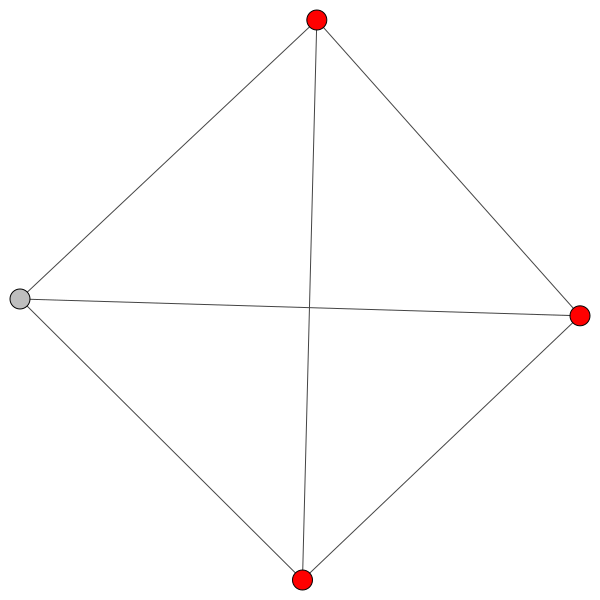

In [60]:
H.vs['color'] = 'red'
H.vs[0]['color'] = 'grey'
ig.plot(H)

<div class="alert alert-info">
Do many of the co-authors collaborate among themselves as well? Why do you think this happens?
</div>

We can also ask `igraph` to calculate the clustering coefficient (which is called *transitivity* in igraph, which is the same concept using different terms) of node 0.

In [61]:
G_coauthorship.transitivity_local_undirected(0)

1.0

<div class="alert alert-info">
What percentage of the co-authors of node 0 have also written papers with each other?
</div>

In [62]:
# The answer is already provided: all the co-authors of node 0 (i.e. 100%) collaborate also among each other.

Let us now calculate this for all nodes.

In [63]:
G_coauthorship.transitivity_avglocal_undirected()

0.8777549843203198

<div class="alert alert-info">
What percentage of the co-authors have also written papers with each other on average? Do you think this is high or not?
</div>

In [64]:
# The answer is already provided: on average, about 88% of the co-authors of a node collaborate among each other.

## Centrality

Often, people want to identify wich nodes seem to be most important in some way in the network. This is often thought of as a type of *centrality* of a node.

### Degree

The simplest type of centrality is the *degree* of a node, which is simply the number of its neighbors. Previously, we saw that node 0 had 3 neighbors, we therefore say its degree is 3.

In [65]:
G_coauthorship.degree(0)

3

We can also simply calculate the degree for everybody and store it in a new vertex attribute called `degree`.

In [66]:
G_coauthorship.vs['degree'] = G_coauthorship.degree()

<div class="alert alert-info">
    What is the degree of <code>'Van Marck, E'</code>?
</div>

In [67]:
# We can simply call the degree function,
G_coauthorship.vs.find(author_eq = 'Van Marck, E').degree()
# Or since it is already stored as an attribute, we can also simply look at that
G_coauthorship.vs.find(author_eq = 'Van Marck, E')['degree']

52

We can also take a look at the complete degree distribution. To plot it, we load the `matplotlib` package. We import the plotting functionality and name the package `plt`. We also include a statement telling Python to show the plots immediately in this notebook.

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

Now let us plot a histogram of the degree, using 50 bins.

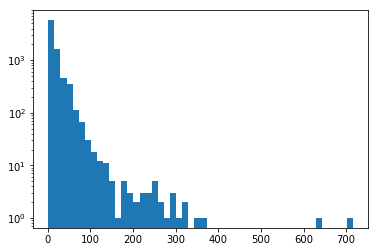

In [69]:
plt.hist(G_coauthorship.vs['degree'], 50);
plt.yscale('log')

This clearly shows that the degree distribution is quite skewed. Most authors have only few collaborators, while a few authors have many collaborators. If the degree distribution is so skewed, it is sometimes referred to as a *scale-free* network, although the exact definition has been a topic of intense discussion recently.

The code below sorts the nodes in descending order of the degree.

In [70]:
highest_degree = sorted(G_coauthorship.vs, key=lambda v: v['degree'], reverse=True)

The `sorted` function takes a list as input, `G_coauthorship.vs` in our case, and sorts it according to a sort key. We indicate the sort key by a small function, called a `lambda` function, that returns the degree. In other words, the `sorted` function will sort the nodes according to the degree. By indicating `reverse=True` we obtain a list that is sorted highest to lowest, instead of the other way around.

You can look at the first five results in the following way.

In [71]:
highest_degree[:5]

[igraph.Vertex(<igraph.Graph object at 0x0000022DAEF22138>, 139, {'author': "D'Alessandro, U", 'degree': 715}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF22138>, 42, {'author': 'Boelaert, M', 'degree': 641}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF22138>, 341, {'author': 'Dorny, P', 'degree': 369}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF22138>, 63, {'author': 'Buscher, P', 'degree': 348}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF22138>, 64, {'author': 'Dujardin, JC', 'degree': 324})]

So, apparently, U D'Allessandro has collaborated with 695 other authors! This of course only considers the number of co-authors, it does not take into account the number of papers written with somebody else.
When specifying such *edge weights* like the number of joint papers, the weighted degree is referred to as the *strength* of a node (which is sometimes a bit confusing term). 

Let us look at the strength of node 0.

In [72]:
G_coauthorship.strength(0, weights='n_joint_papers')

3.0

Apparently, author 0 collaborated with 3 different authors, and has a total strength of 3. But what does this 3 mean? We need to carefully think about this. Suppose that author 0 has co-authored a single publication with three other co-authors, then each of the three co-authors would have an edge weight of `n_joint_papers = 1`. So, the strenght would be 3. Hence, the strength denotes the total number of collaborations that an author had, which depends both on the number of publications and the number of collaborators per paper.

Sometimes, we wish to take into account the number of co-authorships when creating a link weight. We can then fractionally count the weight of each collaboration between $n_a$ authors as

$$\frac{1}{n_a - 1}.$$

We need to go back to the `publications_df` in order to construct such a *fractional* edge weight.

In [73]:
import itertools as itr
[(coauthor[0], coauthor[1], 1/(len(authors) - 1)) for coauthor in itr.combinations(authors, 2)]

[('Osaer, S', 'Goossens, B', 0.3333333333333333),
 ('Osaer, S', 'Eysker, M', 0.3333333333333333),
 ('Osaer, S', 'Geerts, S', 0.3333333333333333),
 ('Goossens, B', 'Eysker, M', 0.3333333333333333),
 ('Goossens, B', 'Geerts, S', 0.3333333333333333),
 ('Eysker, M', 'Geerts, S', 0.3333333333333333)]

We again do this for all publications.

In [74]:
coauthors_per_publication = publications_df['AU_split'].apply(
    lambda authors: 
        [(coauthor[0], coauthor[1], 1, 1/(len(authors) - 1)) 
             for coauthor in itr.combinations(authors, 2)])

The variable `coauthors_per_publication` is now a list of a list of co-authors per publication, but including a full weight of `1` and a fractional weight of `1/(len(authors) - 1)`, where `len(authors)` is the number of authors of the publications. We again need to flatten this list.

In [75]:
coauthors = [coauthor 
                 for coauthors_publication in coauthors_per_publication 
                     for coauthor in coauthors_publication]

We can again create the network, but now we can pass two edge attributes, `n_joint_papers` and `n_joint_papers_frac`. We of course also have to simplify the network again.

In [76]:
G_coauthorship = ig.Graph.TupleList(
      edges=coauthors,
      vertex_name_attr='author',
      directed=False,
      edge_attrs=('n_joint_papers', 'n_joint_papers_frac')
      )
G_coauthorship = G_coauthorship.simplify(combine_edges='sum')

<div class="alert alert-info">
What is the sum of <code>n_joint_papers_frac</code> over all co-authors? Then shouldn't the strength sum up to a whole number? Why isn't that the case here? (Hint: look at the authors of publication <code>'WOS:000242241600004'</code)
</div>

In [77]:
print(sum(G_coauthorship.es['n_joint_papers_frac']))
# The point is that there is a self-loop from 'Koirala, S' to 'Koirala, S', which gets removed in the simplification of the graph
display(publications_df.loc['WOS:000242241600004', 'AU_split'])

9317.272582974803


['Schenkel, K',
 'Rijal, S',
 'Koirala, S',
 'Koirala, S',
 'Vanlerberghe, V',
 'Van der Stuyft, P',
 'Gramiccia, M',
 'Boelaert, M']

### Betweenness centrality

Betweenness centrality is much more elaborate, and gives an indication of the number of times a node is on the shortest path from one node to another node.

As you can imagine, this can take quite some time to calculate for all nodes. We will therefore use the somewhat smaller bibliographic coupling network of journals.

<div class="alert alert-warning">
    <b>Note:</b> On larger networks, it may take a long time to calculate the betweenness centrality.
</div>

In [78]:
G_coupling.vs['betweenness'] = G_coupling.betweenness()

Now we can look at the journals that have the highest betweenness.

In [79]:
sorted(G_coupling.vs, key=lambda v: v['betweenness'], reverse=True)[:5]

[igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 1, {'SO': 'PLOS NEGLECTED TROPICAL DISEASES', 'betweenness': 43.42301587301588}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 0, {'SO': 'TROPICAL MEDICINE & INTERNATIONAL HEALTH', 'betweenness': 38.92301587301587}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 4, {'SO': 'TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL MEDICINE AND HYGIENE', 'betweenness': 37.08968253968254}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 2, {'SO': 'AMERICAN JOURNAL OF TROPICAL MEDICINE AND HYGIENE', 'betweenness': 29.81468253968254}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 6, {'SO': 'PARASITES & VECTORS', 'betweenness': 16.8813492063492})]

As we did previously when dealing with shortest paths, we can also use a weight for determining the shortest paths.

In [80]:
G_coupling.vs['betweenness_weighted'] = G_coupling.betweenness(weights='coupling')

<div class="alert alert-info">
What is journal with the highest weighted betweenness centrality? Does this make sense if you compare it to the unweighted betweenness centrality?
</div>

In [81]:
sorted(G_coupling.vs, key=lambda v: v['betweenness_weighted'], reverse=True)[:5]
# Note especially the SOUTHEAST ASIAN JOURNAL OF TROPICAL MEDICINE AND PUBLIC HEALTH
# It has a very low betweenness, but the highest weighted betweenness. This is because
# of the counter-intuitive behaviour of the shortest path with these weights.

[igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 3, {'SO': 'SOUTHEAST ASIAN JOURNAL OF TROPICAL MEDICINE AND PUBLIC HEALTH', 'betweenness': 0.1111111111111111, 'betweenness_weighted': 110.34761904761906}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 4, {'SO': 'TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL MEDICINE AND HYGIENE', 'betweenness': 37.08968253968254, 'betweenness_weighted': 81.24523809523811}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 13, {'SO': 'JOURNAL OF TROPICAL MEDICINE', 'betweenness': 5.710317460317461, 'betweenness_weighted': 73.27619047619048}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 6, {'SO': 'PARASITES & VECTORS', 'betweenness': 16.8813492063492, 'betweenness_weighted': 69.56666666666666}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 1, {'SO': 'PLOS NEGLECTED TROPICAL DISEASES', 'betweenness': 43.42301587301588, 'betweenness_weighted': 51.409523809523805})]

<div class="alert alert-danger">
    <b>Attention!</b> Weighted shortest paths have the <em>lowest</em> total weight.
</div>

### Pagerank

One way of identifying central nodes relies on the idea of a random walk in a network. We will study this in the journal bibliographic coupling network. When performing such a random walk, we simply go from one journal to the next, following the bibliographic coupling links. The journal that is most frequently visited during such a random walk is then seen as most central. This is actually the idea that underlies Google's famous search engine. Luckily, we can compute that a lot faster than betweenness.

In [82]:
G_coupling.vs['pagerank'] = G_coupling.pagerank()

<div class="alert alert-info">
Get the top 5 most central journals according to Pagerank. Who is the most central? Are the results very different from the betweenness?
</div>

In [83]:
sorted(G_coupling.vs, key=lambda v: v['pagerank'], reverse=True)[:5]
# The outcomes are quite similar for the top-5 compared to the unweighted betweenness

[igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 1, {'SO': 'PLOS NEGLECTED TROPICAL DISEASES', 'betweenness': 43.42301587301588, 'betweenness_weighted': 51.409523809523805, 'pagerank': 0.07814324326935798}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 4, {'SO': 'TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL MEDICINE AND HYGIENE', 'betweenness': 37.08968253968254, 'betweenness_weighted': 81.24523809523811, 'pagerank': 0.07698657058058592}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 0, {'SO': 'TROPICAL MEDICINE & INTERNATIONAL HEALTH', 'betweenness': 38.92301587301587, 'betweenness_weighted': 0.5833333333333333, 'pagerank': 0.07696548264630954}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 2, {'SO': 'AMERICAN JOURNAL OF TROPICAL MEDICINE AND HYGIENE', 'betweenness': 29.81468253968254, 'betweenness_weighted': 0.2, 'pagerank': 0.07132148276054204}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 6, {'SO': 'PARASITES 

We can again take into account the weights. In pagerank this means that a journal that is a more closely bibliographically coupled will be more likely to be visited during a random walk. This is actually much more in line with our intuition than the shortest path. Let us see what we get if we do that.

In [84]:
G_coupling.vs['pagerank_weighted'] = G_coupling.pagerank(weights='coupling')

<div class="alert alert-info">
Are the results different for the weighted version of pagerank?
</div>

In [85]:
sorted(G_coupling.vs, key=lambda v: v['pagerank_weighted'], reverse=True)[:5]
# There are some differences, but these make sense from the perspective of the weights.

[igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 1, {'SO': 'PLOS NEGLECTED TROPICAL DISEASES', 'betweenness': 43.42301587301588, 'betweenness_weighted': 51.409523809523805, 'pagerank': 0.07814324326935798, 'pagerank_weighted': 0.21483806133497008}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 0, {'SO': 'TROPICAL MEDICINE & INTERNATIONAL HEALTH', 'betweenness': 38.92301587301587, 'betweenness_weighted': 0.5833333333333333, 'pagerank': 0.07696548264630954, 'pagerank_weighted': 0.1820837844437379}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 2, {'SO': 'AMERICAN JOURNAL OF TROPICAL MEDICINE AND HYGIENE', 'betweenness': 29.81468253968254, 'betweenness_weighted': 0.2, 'pagerank': 0.07132148276054204, 'pagerank_weighted': 0.12657074002880048}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DAEF224F8>, 4, {'SO': 'TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL MEDICINE AND HYGIENE', 'betweenness': 37.08968253968254, 'betweenness_weighted': 81.2452380

<div class="alert alert-info">
Pagerank is very similar to the techniques that underly the journal "Eigenfactor" and the "SCImago Journal Rank", which are seen as indicators of the scientific impact of a journal. Do you think it makes sense to interpret Pagerank on a bibliographic coupling network as the scientific impact of a journal? Why (not)?
</div>

In [86]:
# This is only meant for reflection. 
# In a direct citation network, centrality such as pagerank might be interpreted as the scientific impact of a journal.
# In a bibliographic coupling network, it is less clear what this is: a link indicate that articles in the two journals
# frequently cite the same literature. This does not necessarily have something to do with scientific impact.

# Analysis of your own data

You have now learned the basics of handling WoS files and transforming them into scientometric networks. Please take some time now to do your own analysis.

<div class="alert alert-info">
Go to <a href="http://webofknowledge.com/">Web of Science</a> and select a publication set of interest. Make sure that the number of publications is higher than 1000, but lower than 5000. Export the files as follows:
<ol>
  <li> Export using "Save to Other File Formats".
  <li> Select the appropriate records (e.g. 1-500, 501-1000, etc...).
  <li> Select the Record Content "Full Record and Cited References".
  <li> Select the File Format "Tab delimited (Win, UTF8)".
  <li> Click on Send.
</ol>
Repeat the above steps for each batch of 500 publications.

Load the data from all files you downloaded using <code>pandas</code>
</div>

In [87]:
# We will simply illustrate with the data we already downloaded
files = sorted(glob.glob('data-files/wos/tab-delimited/*.txt'))
publications_df = pd.concat(pd.read_csv(f, sep='\t', quoting=csv.QUOTE_NONE, 
                                        usecols=range(68), index_col='UT') for f in files)
publications_df = publications_df.sort_index()

<div class="alert alert-info">
Create a co-authorship network of your publications. Hint: use the approach you encountered earlier.
</div>

In [88]:
# Split authors
publications_df['AU_split'] = publications_df['AU'].fillna('').str.split('; ')

# Create combinations of co-authors
coauthors_per_publication = publications_df['AU_split'].apply(
    lambda authors: 
        [(coauthor[0], coauthor[1], 1, 1/(len(authors) - 1)) 
             for coauthor in itr.combinations(authors, 2)])

# Flatten list
coauthors = [coauthor 
                 for coauthors_publication in coauthors_per_publication 
                     for coauthor in coauthors_publication]

# Create graph
G_coauthorship = ig.Graph.TupleList(
      edges=coauthors,
      vertex_name_attr='author',
      directed=False,
      edge_attrs=('n_joint_papers', 'n_joint_papers_frac')
      )
G_coauthorship = G_coauthorship.simplify(combine_edges='sum')

<div class="alert alert-info">
Identify the authors that are most central to the coauthorship network and interpret the results.
</div>

In [89]:
G_coauthorship.vs['pagerank'] = G_coauthorship.pagerank(weights='n_joint_papers_frac')
sorted(G_coauthorship.vs, key=lambda v: v['pagerank'], reverse=True)[:5]

[igraph.Vertex(<igraph.Graph object at 0x0000022DB83EB138>, 42, {'author': 'Boelaert, M', 'pagerank': 0.007520079428002056}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DB83EB138>, 139, {'author': "D'Alessandro, U", 'pagerank': 0.006522483078332368}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DB83EB138>, 341, {'author': 'Dorny, P', 'pagerank': 0.0036985878158593446}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DB83EB138>, 25, {'author': 'Van der Stuyft, P', 'pagerank': 0.003599480865181576}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DB83EB138>, 79, {'author': 'Polman, K', 'pagerank': 0.003089653527232232})]

<div class="alert alert-info">
Create a co-citation network of your publications. Hint: use the bibliographic coupling approach, but switch the roles of the source and the target.
</div>

In [90]:
# The UT is the index of the dataframe, so we only need the 'CR' column
publication_with_cr_df = publications_df.loc[pd.notnull(publications_df['CR']), ['CR']]

# Split the cited references
publication_with_cr_df['CR'] = publication_with_cr_df['CR'].str.split('; ')

# We can use row.name to refer to the UT.
ut_cits = [(row.name, cr) 
            for idx, row in publication_with_cr_df.iterrows()
                for cr in row['CR']]
ut_cits_df = pd.DataFrame(ut_cits, columns=('UT', 'CR'))

# Create all co-citations
cocitation_per_ut = ut_cits_df.groupby('UT').apply(lambda x: itr.combinations(x['CR'], 2))

# Flatten list
cocitations = [cocit
                 for cocits in cocitation_per_ut
                   for cocit in cocits]

# Creat graph
G_cocitations = ig.Graph.TupleList(
      edges=cocitations,
      vertex_name_attr='CR',
      directed=False
      )

<div class="alert alert-info">
Identify the publications that are most central to the co-citation network and interpret the results. Are they relatively recent publications or not?
</div>

In [91]:
G_cocitations.vs['pagerank'] = G_cocitations.pagerank()
sorted(G_cocitations.vs, key=lambda v: v['pagerank'], reverse=True)[:5]

[igraph.Vertex(<igraph.Graph object at 0x0000022DB71469A8>, 531, {'CR': 'MAGNUS E, 1978, ANN SOC BELG MED TR, V58, P169', 'pagerank': 0.0004102987228153271}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DB71469A8>, 13315, {'CR': 'WHO, 2010, GUID TREATM MAL', 'pagerank': 0.0004063308443739557}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DB71469A8>, 424, {'CR': 'Katz N, 1972, Rev Inst Med Trop Sao Paulo, V14, P397', 'pagerank': 0.0004058519042853161}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DB71469A8>, 18847, {'CR': 'Alvar J, 2012, PLOS ONE, V7, DOI 10.1371/journal.pone.0035671', 'pagerank': 0.00039159548143953267}),
 igraph.Vertex(<igraph.Graph object at 0x0000022DB71469A8>, 24166, {'CR': 'WHO, 2013, WORLD MALARIA REPORT 2013, P1', 'pagerank': 0.0003868724154577304})]